In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from scipy.special import kn,zetac
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
label = 'gluino_10ns_1000'
histograms = ['vdecHist','recHist','massHist','pTHist','betaHist','metHist']
axesLabels = {'vdecHist' : [r'$R$ (mm)',r'$|z|$ (mm)'],'recHist' : [r'$|\eta|$',r'$\beta$'], 
          'massHist' : [r'$m_{dE/dx}$ (GeV)',r'$m_{ToF}$ (GeV)'],
          'pTHist' : [r'$p_T$ (GeV)','N'], 'betaHist' : [r'$\beta$','N'], 
              'metHist' : [r'$E_T^{miss}$ (GeV)','N']}
bins = {'recHist' : 10, 'vdecHist' : 20,
          'massHist' : 20,
          'pTHist' : 10,
           'betaHist' : 10, 'metHist': 20}

In [3]:
data = {}
for hist in histograms:
    fname = label+'_'+hist+'.dat'
    histData = np.genfromtxt(fname,names=True,delimiter=',')
    data[hist] = np.array([list(pt) for pt in histData])

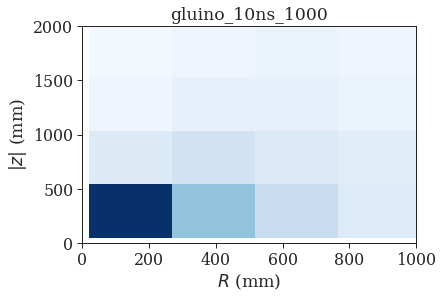

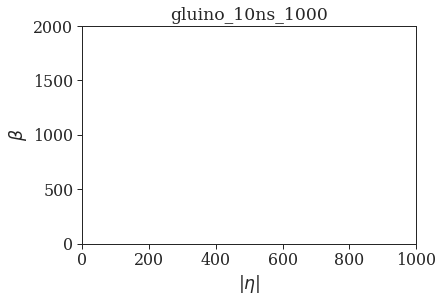

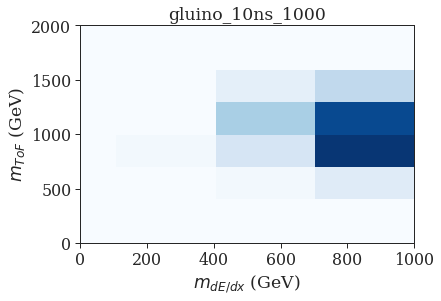

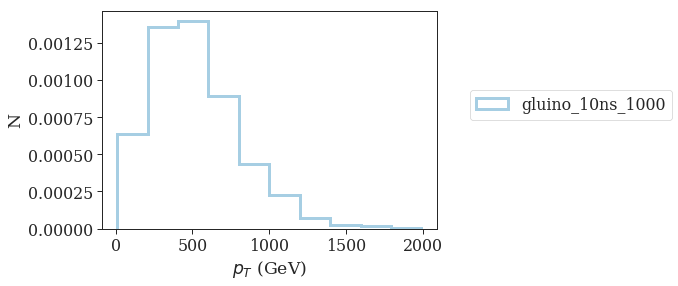

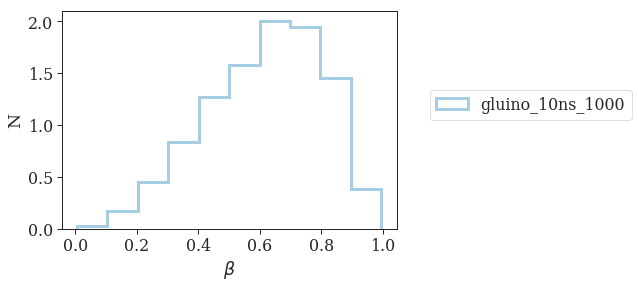

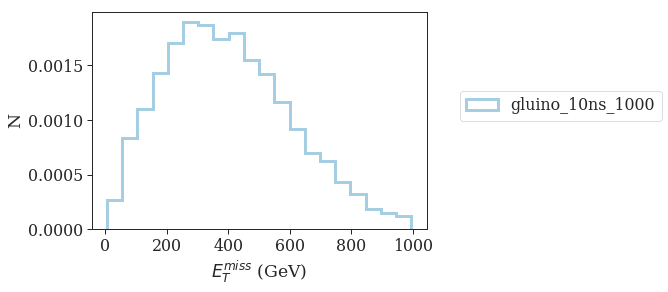

In [6]:
for hist in data:
    
    dim = data[hist].shape[1]-1
    if dim == 2:
        fig, axes = plt.subplots(1,1,sharey=True,figsize=(6, 4))
    elif dim == 1:
        fig, axes = plt.subplots(1, 1)
    
    hData = data[hist]
    if dim == 2:
        ax = axes
        ax.hist2d(hData[:,0],hData[:,1],bins=bins[hist],cmap='Blues',weights=hData[:,2]
                       ,label=label)
        ax.set_title(label)
    elif dim == 1:
        ax = axes
        ax.hist(hData[:,0],bins=bins[hist],weights=hData[:,1],label=label,
                histtype='step',linewidth=3,density=True)
#             ax.set_yscale('log')
    ax.set_xlabel(axesLabels[hist][0])
    ax.set_ylabel(axesLabels[hist][1])
    if dim == 1:
        plt.legend(loc=(1.1,0.5))
            


In [9]:
nTot = 0
nOut = 0
for pt in data['vdecHist']:
    if pt[0] > 3.9e3 or pt[1] > 6.1e3:
        nOut += pt[2]
    nTot += pt[2]

In [12]:
(nOut/nTot)*0.3

0.0199340804218853

In [15]:
nTot = 0
betaSum = 0.
for pt in data['betaHist']:
    betaSum += pt[0]*pt[1]
    nTot += pt[1]
betaSum/nTot

0.6159113179813818

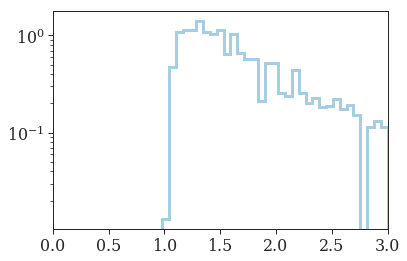

In [35]:
plt.hist(1./data['betaHist'][:,0],bins=np.linspace(0.,3.,50).tolist(),weights=data['betaHist'][:,1],label=label,
                histtype='step',linewidth=3,density=True)
plt.yscale('log')
plt.xlim(0.,3.)
plt.show()